***¿Qué he aprendido en esta práctica?***


Deep learning (aprendizaje profundo) es una nueva técnica dentro del aprendizaje automático (machine learning) basado en arquitecturas de redes neuronales. Está relacionado con algoritmos inspirados en la estructura y función del cerebro, de ahí el nombre redes neuronales artificiales. Las redes neuronales artificiales se construyen como el cerebro humano, con nodos de neuronas conectados como una red.

Mientras que los modelos tradicionales crean análisis con estructuras lineales, los modelos de deep learning se caracterizan por su estructura jerárquica permitiendo procesar los datos con un enfoque no lineal.

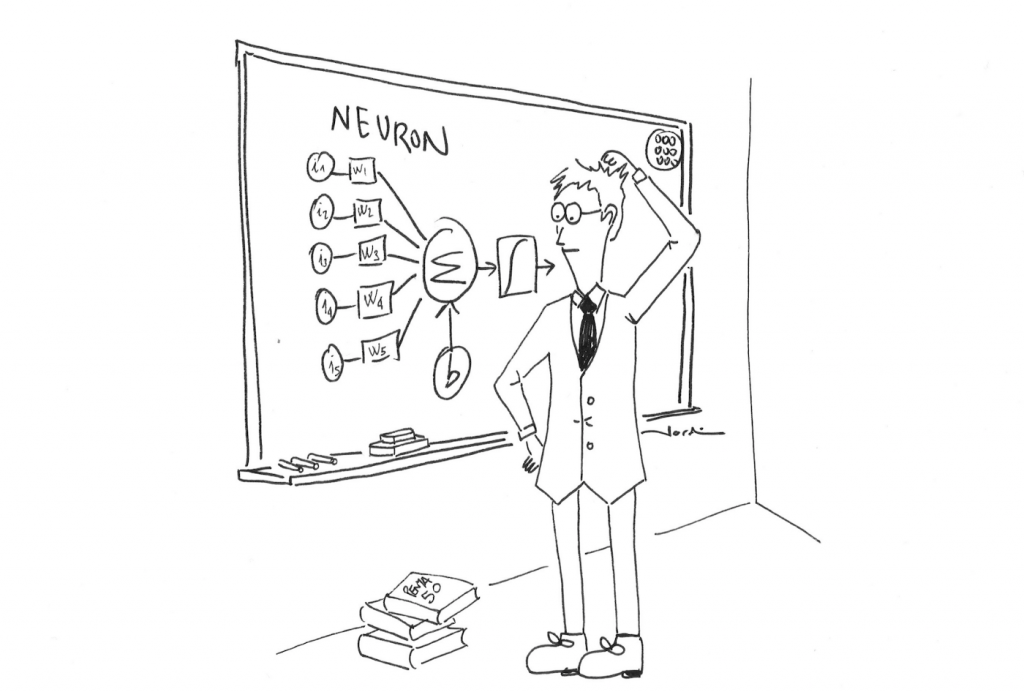

***Api Keras***
La biblioteca Keras Python hace que la creación de modelos de aprendizaje profundo sea rápida y sencilla.

La API secuencial le permite crear modelos capa por capa para la mayoría de los problemas. Tiene la limitación de que no le permite crear modelos que compartan capas o que tengan múltiples entradas o salidas.

La API funcional en Keras es una forma alternativa de crear modelos que ofrece mucha más flexibilidad, incluida la creación de modelos más complejos

***Modelo de atención***
Los mecanismos de atención fueron introducidos por primera vez asistiendo a redesneuronales recurrentes en el procesamiento de lenguaje natural. Estos permiten a la red aponer atención dinámicamente a secciones de la entrada que son relevantes para la salida,similar a como nosotros nos concentramos en palabras específicas de una oración u objetosen una imagen. 

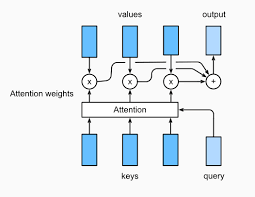



## Arquitecturas en Deep Learning

***Importar librerias***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, gzip, matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
# import BatchNormalization
from keras.layers.normalization import BatchNormalization


***Descarga de los Datos***

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz --no-check-certificate

--2021-04-15 14:48:41--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 1185830 (1.1M) [application/x-gzip]
Saving to: ‘p2_data1.pkl.gz.1’

p2_data1.pkl.gz.1   100%[===================>]   1.13M  3.25MB/s    in 0.3s    

2021-04-15 14:48:42 (3.25 MB/s) - ‘p2_data1.pkl.gz.1’ saved [1185830/1185830]



***Leer datos***

In [ ]:
with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)
x_train = x_train / 255
x_test = x_test / 255

***Comprobando el tamaño de los tensores***

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(11769, 32, 32, 1) (11769,) (1932, 32, 32, 1) (1932,)


***Función view_data1***

In [ ]:
def view_data1(x, y, labels, n=6):
    k = 0
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, k+1)
            plt.imshow( 1 - x[k].reshape(32, 32), interpolation='none', cmap='gray')
            #plt.title(r'$y_{%d}$ = %d' % (k, y[k]))
            #plt.title('y = %s' % labels[y[k]], fontsize=8)
            plt.title(r'$y_{%d}$ = %d' % (k, labels[y[k]]),  fontsize=8 )
            plt.gca().axis('off')
            k += 1
    plt.show()

In [ ]:
view_data1(x_train, y_train, y_train)

***Ejemplo de una red convolucional***

In [ ]:
model1 = keras.Sequential([
  keras.Input(shape=(32, 32, 1)),
  layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
  activation='relu', padding='same'),
  layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
  activation='relu', padding='same'),
  layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
  activation='relu', padding='same'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2),
  layers.Softmax(),
 ])

***replica con la Arquitectura Funcional de Keras***

In [ ]:
  xin =keras.Input(shape=(32, 32, 1), name ="img")
  x = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)  
  x = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)
  
  a = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)

  x = layers.Multiply()([x, a])

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(2)(x)  
  xout = layers.Softmax()(x)

  model1 = keras.Model(inputs=xin, outputs=xout)
  model1.summary()
  

In [ ]:
keras.utils.plot_model(model1, 'model11.png', show_shapes=True)


In [ ]:
model1_att = keras.Model(inputs=xin, outputs=[xout, a])
y_pred_test, a_test = model1_att.predict(x_test)


In [ ]:
def view_data2(x, y):
    k = 0
    for i in range(2):
        for j in range(2):
            plt.subplot(2, 4, 2*k+1)
            plt.imshow( x[k].reshape(32, 32), interpolation='none', cmap='gray')
            plt.title(r'$x_{%d}$' % k)
            plt.gca().axis('off')
            
            plt.subplot(2, 4, 2*k+2)
            plt.imshow( y[k].reshape(32, 32), interpolation='none',cmap='gray')
            plt.title(r'$y_{%d}$' % k)
            plt.gca().axis('off')
            k += 1
    plt.show()

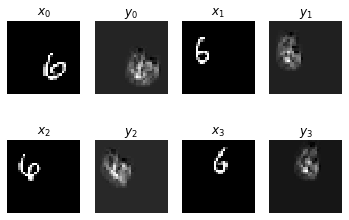

In [ ]:
view_data2(x_test, a_test)

In [ ]:
def view_data3(x, y):
    k = 0
    for i in range(4):
        for j in range(4):
            plt.subplot(4, 4, k+1)
            plt.imshow( x[k].reshape(32, 32), interpolation='none', cmap='gray')
            plt.title(r'$y_{%d}$ = %d' % (k, y[k]))
            plt.gca().axis('off')
            k += 1
    plt.show()

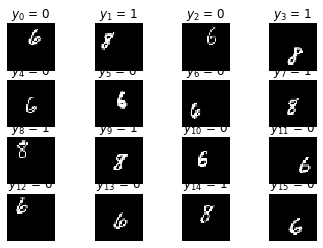

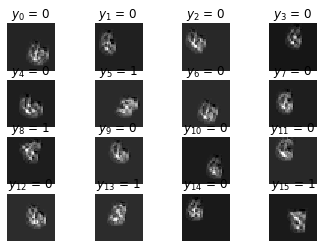

In [ ]:
view_data3(x_train, y_train)
view_data3(a_test, y_test)

In [ ]:
model1.compile(
 loss=keras.losses.MeanSquaredError(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1),
 metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [ ]:
model1.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

#Arquitectura Residual

***inciso d***

In [ ]:
  xin =keras.Input(shape=(32, 32, 1), name ="img")
  x = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)  
  x = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)
  a = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(x)

  x = layers.GlobalAveragePooling2D()(x)    
  x = layers.Multiply()([x, a])


  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(2)(x)  
  xout = layers.Softmax()(x)

  model2 = keras.Model(inputs=xin, outputs=xout)
  model2.summary()

In [ ]:
keras.utils.plot_model(model2, 'model2.png', show_shapes=True)

In [ ]:
class TwoConvBlock():
 def __init__(self, ch_out):
    self.conv1 = layers.Conv2D(ch_out, kernel_size=(5, 5), strides=(2, 2),
    activation='relu', padding='same')
    self.conv2 = layers.Conv2D(ch_out, kernel_size=(3, 3), strides=(2, 2),
    activation='relu', padding='same')
 
 
 def __call__(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    return x

tconv1 = TwoConvBlock(16)
xin = keras.Input(shape=(32, 32, 1))
print(xin.shape)
x = tconv1(xin) # aqui se usa el método definido como “call”
print(x.shape)

(None, 32, 32, 1)
(None, 8, 8, 16)


***inciso e***

In [ ]:
  xin =keras.Input(shape=(32, 32, 1), name ="img")
  x = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)  
  x1 = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)
  
  tconv1 = TwoConvBlock(64)
  x = tconv1(x1)   
  
  a = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(x1)
  

  x = layers.GlobalAveragePooling2D()(x)    
  x = layers.Multiply()([x, a])


  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(2)(x)  
  xout = layers.Softmax()(x)

  model3 = keras.Model(inputs=xin, outputs=xout)
  model3.summary()

In [ ]:
keras.utils.plot_model(model3, 'model3.png', show_shapes=True)

***iniciso f ***


In [ ]:
mse = keras.Sequential()   
##creamos nuestra primera capa convolucional
mse.add(layers.Conv2D(16, kernel_size=(3,3), padding='same', input_shape=(32,32,1)))
mse.add(layers.BatchNormalization())
mse.add(layers.Activation('relu'))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

##creamos nuestra segunda capa convolucional
mse.add(layers.Conv2D(32, kernel_size=(3,3), padding='same'))
mse.add(layers.BatchNormalization())
mse.add(layers.Activation('relu'))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

##creamos nuestra tercera capa convolucional
mse.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))
mse.add(layers.BatchNormalization())
mse.add(layers.Activation('relu'))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

mse.add(layers.Conv2DTranspose(64,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))
mse.add(layers.Conv2DTranspose(128,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))
mse.add(layers.Conv2DTranspose(1,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))

mse.summary()

  

In [ ]:
keras.utils.plot_model(mse, 'model4.png', show_shapes=True)

In [ ]:
model4.compile(
 loss=keras.losses.MeanSquaredError(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1),
 metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [ ]:
model4.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

In [ ]:
model4.compile(
 loss=keras.losses.MeanSquaredError(),
 optimizer=keras.optimizers.Adam(learning_rate=0.1),
 metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

model4.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

##Modelos Eficientes

In [ ]:
def get_model():
  inputs  = keras.Input(shape=(32, 32, 1), name ="img")
  x       = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(inputs)  
  x       = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(x)
  outputs = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(x)
  
  return keras.Model(inputs, outputs)

In [ ]:
model11 = get_model()
model12 = get_model()
model13 = get_model()

inputs = keras.Input(shape=(32, 32, 1), name ="img")
y1 = model11(inputs)
y2 = model12(inputs)
y3 = model13(inputs)
outputs = layers.average([y1, y2, y3])

ensemble_model = keras.Model(inputs= inputs, outputs= outputs)

ensemble_model.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
model_16 (Functional)           (None, 32, 32, 1)    5089        img[0][0]                        
__________________________________________________________________________________________________
model_17 (Functional)           (None, 32, 32, 1)    5089        img[0][0]                        
__________________________________________________________________________________________________
model_18 (Functional)           (None, 32, 32, 1)    5089        img[0][0]                        
___________________________________________________________________________________________

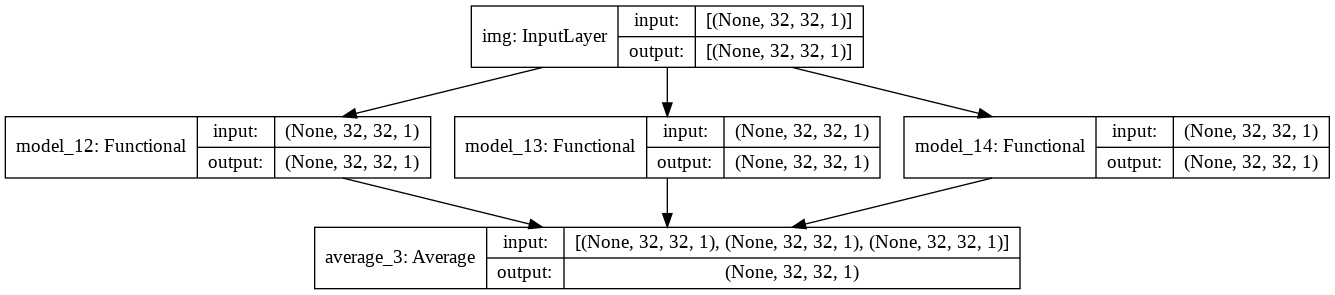

In [ ]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

In [ ]:
xin =keras.Input(shape=(32, 32, 1), name ="img")
x1 = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)  
x2 = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)
x3 = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu', padding='same')(xin)
 
a = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(xin)

x = layers.average([x1, x2, x3])  
x = layers.Multiply()([x, a])

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(2)(x)  
xout = layers.Softmax()(x)

model20 = keras.Model(inputs=xin, outputs=xout)
model20.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 32, 32, 16)   160         img[0][0]                        
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 32, 32, 16)   160         img[0][0]                        
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 32, 32, 16)   160         img[0][0]                        
___________________________________________________________________________________________

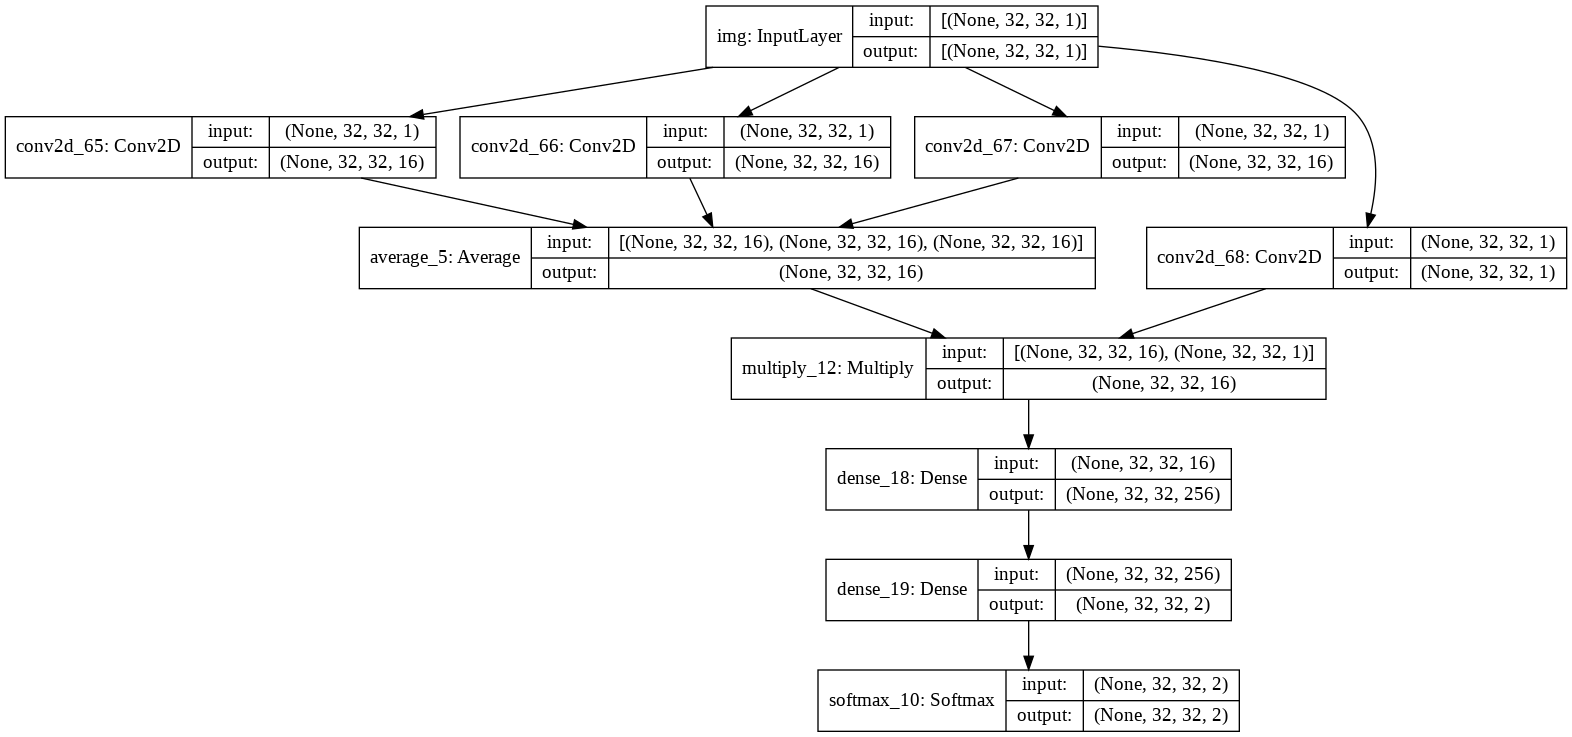

In [ ]:
keras.utils.plot_model(model20, show_shapes=True)

***bottleneck***

In [ ]:
xin =keras.Input(shape=(32, 32, 1), name ="img")

x  = layers.Activation("relu")(xin)
x  = layers.DepthwiseConv2D((3,3),padding="same",use_bias=False)(x)
x  = layers.BatchNormalization()(x)
x  = layers.Conv2D(16,(1,1),padding="same",use_bias=False)(x)
x  = layers.BatchNormalization()(x)
 
a = layers.Conv2D(1, kernel_size=(3, 3), strides=(1, 1),activation='sigmoid', padding='same')(xin)

x = layers.Multiply()([x, a])

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(2)(x)  
xout = layers.Softmax()(x)

model21 = keras.Model(inputs=xin, outputs=xout)
model21.summary()

 

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 1)    0           img[0][0]                        
__________________________________________________________________________________________________
depthwise_conv2d_4 (DepthwiseCo (None, 32, 32, 1)    9           activation_4[0][0]               
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 1)    4           depthwise_conv2d_4[0][0]         
___________________________________________________________________________________________

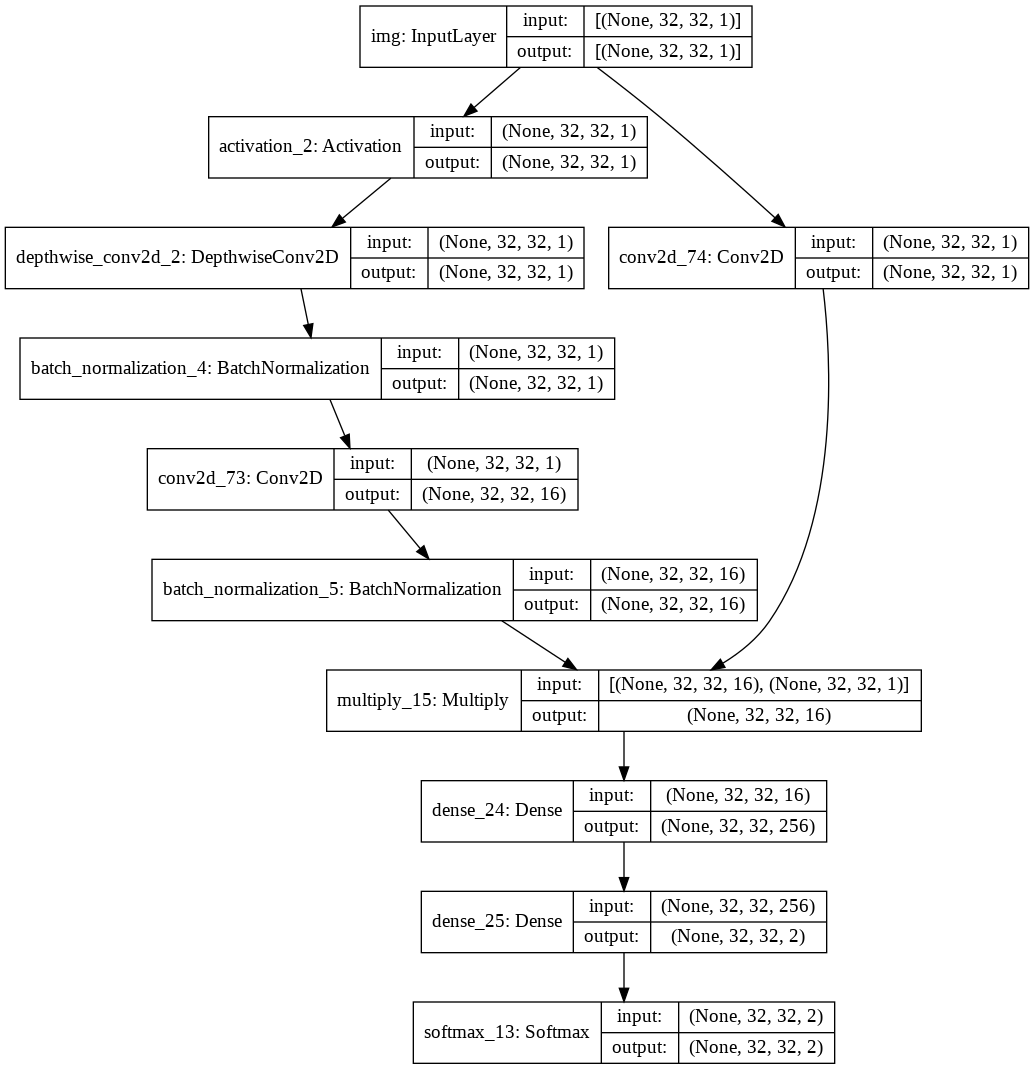

In [ ]:
keras.utils.plot_model(model21, show_shapes=True)